<a href="https://colab.research.google.com/github/samipn/Pycaret/blob/main/04_clustering_wholesale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (Wholesale Customers) — PyCaret

# ✅ Enable GPU in Colab
*Runtime → Change runtime type → **T4 / L4 GPU** → Save.*  
Each notebook sets `use_gpu=True` in `setup()`. Models that support GPU (e.g., XGBoost, CatBoost) will leverage it automatically if available.

Unsupervised clustering on UCI Wholesale Customers dataset.

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 7.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of umap-learn to de

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


,Description,Value
0,Session id,99
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2130,120.4012,1.6153,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.213           120.4012          1.6153            0           0   

   Completeness  
0             0  


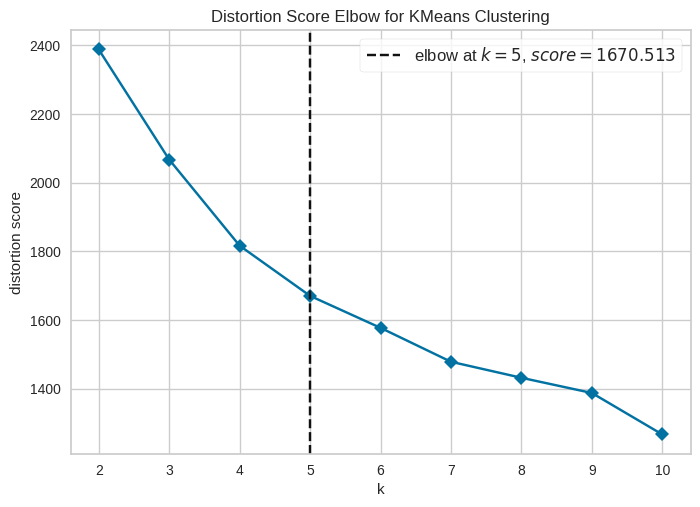

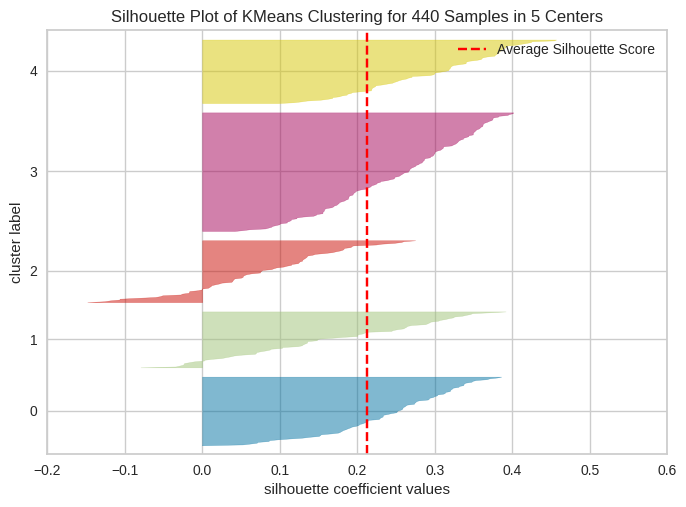

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 4
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 4
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 4
3,1,3,13265,1196,4221,6404,507,1788,Cluster 1
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 4


In [4]:
from pycaret.clustering import setup, create_model, assign_model, plot_model, save_model, pull
s = setup(df, session_id=99, normalize=True, transformation=True, ignore_features=None, use_gpu=True)
kmeans = create_model('kmeans', num_clusters=5)
summary = pull(); print(summary)
plot_model(kmeans, plot='elbow')
plot_model(kmeans, plot='silhouette')
clustered = assign_model(kmeans)
clustered.head()

In [5]:
save_model(kmeans, 'kmeans_model')
clustered.to_csv('clusters.csv', index=False)
print("Saved clusters to clusters.csv")

Transformation Pipeline and Model Successfully Saved
Saved clusters to clusters.csv
